# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [4]:
# Your code here

import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of       PassengerId  Survived Pclass  \
0             1.0       0.0      3   
1             2.0       1.0      1   
2             3.0       1.0      3   
3             4.0       1.0      1   
4             5.0       0.0      3   
...           ...       ...    ...   
1386        839.0       0.0      ?   
1387        839.0       1.0      2   
1388        839.0       0.0      ?   
1389        839.0       1.0      ?   
1390        839.0       0.0      ?   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0    1.0   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                                Heikkinen, Miss. Laina  female  26.0    0.0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                              Allen, Mr. William Henry    male  35.0    0.0   
...                            

Use the `.info()` method to quickly preview which features have missing data

In [2]:
# Your code here


SyntaxError: unexpected EOF while parsing (<ipython-input-2-157756f78029>, line 2)

## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

In [6]:
# Your code here
df['Age'].describe()

count    1209.000000
mean       29.731894
std        16.070125
min         0.420000
25%        20.000000
50%        27.000000
75%        40.000000
max        80.000000
Name: Age, dtype: float64

In [10]:
# agregate  alias agg can be used
df.Age.agg(['mean','median','std', 'min'])

mean      29.731894
median    27.000000
std       16.070125
min        0.420000
Name: Age, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

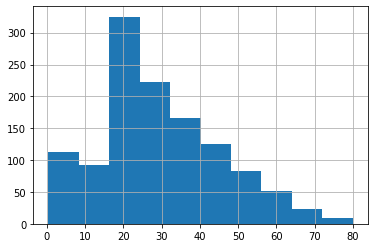

In [17]:
df.Age.agg(['mean','median','std', 'min'])
df['Age'].hist()

(array([ 88.,  48.,  47., 122., 261., 134., 128.,  89.,  79.,  69.,  46.,
         46.,  26.,  10.,  13.,   3.]),
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 16 Patch objects>)

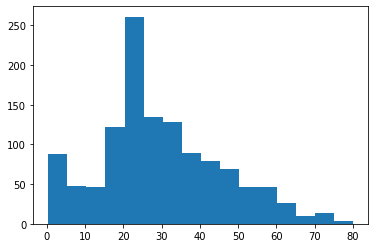

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# df.Age.hist(bins = 16)
plt.hist(df.Age, bins =16)

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [23]:
# Your code here
df.Age.fillna(df.Age.mean()).value_counts()


29.731894    182
22.000000    129
24.000000     36
18.000000     36
25.000000     29
            ... 
34.500000      4
13.000000      3
70.500000      3
80.000000      3
36.500000      2
Name: Age, Length: 89, dtype: int64

In [24]:
pd.set_option('display.max_rows', 200)

In [25]:
df.Age.fillna(df.Age.mean()).unique()
mean_ages 

array([22.        , 38.        , 26.        , 35.        , 29.73189413,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [30]:
filled_ages = df.Age.fillna(df.Age.mean())

In [31]:
med_filled_ages = df.Age.fillna(df.Age.median())


In [43]:
filled_ages.agg(['mean','median','std', 'min'])

mean      29.731894
median    29.731894
std       14.981155
min        0.420000
Name: Age, dtype: float64

In [41]:
df.df.Age.fillna(df.Age.median()).agg(['mean','median','std', 'min'])

AttributeError: 'DataFrame' object has no attribute 'df'

In [39]:
med_filled_ages.agg(['mean','median','std', 'min'])


mean      29.374450
median    27.000000
std       15.009476
min        0.420000
Name: Age, dtype: float64

(array([ 88.,  48.,  47., 122., 261., 316., 128.,  89.,  79.,  69.,  46.,
         46.,  26.,  10.,  13.,   3.]),
 array([ 0.42   ,  5.39375, 10.3675 , 15.34125, 20.315  , 25.28875,
        30.2625 , 35.23625, 40.21   , 45.18375, 50.1575 , 55.13125,
        60.105  , 65.07875, 70.0525 , 75.02625, 80.     ]),
 <a list of 16 Patch objects>)

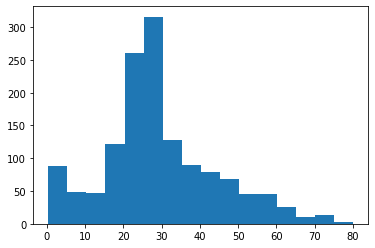

In [40]:
plt.hist(med_filled_ages, bins =16)

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [ ]:
# Your code here


### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

In [46]:
# Your  here
df.Age.dropna()
df.Age.agg(['mean','median','std', 'min'])
drop_age = df.Age.agg(['mean','median','std', 'min'])




### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.